In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',400)

In [2]:
train = pd.read_parquet('../input/ubiquant-parquet/train_low_mem.parquet')
print(train.shape)

(3141410, 304)


In [3]:
train.head()

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,0.965623,1.230508,0.114809,-2.012777,0.004936,0.284220,0.502155,-0.287932,-1.169338,-0.267310,-0.574423,-0.771869,1.012212,-1.230507,1.785726,-2.090686,0.325659,-0.877769,1.048786,0.131774,-0.349609,-1.813385,0.099226,-0.241020,1.604571,0.003637,-0.902062,0.221581,0.610063,-0.738558,2.097248,-0.913877,-0.293838,-0.037989,0.685313,0.000000,0.414692,-0.469456,-1.085879,-0.106443,0.059437,0.483066,1.189394,0.506955,0.754617,0.317529,-0.183254,5.163592,0.677065,-0.440767,0.631208,-1.845506,0.227782,0.841269,0.667432,-0.854111,-0.170443,-0.119705,-0.504936,0.662736,1.933138,-0.812392,0.072803,-0.778987,-0.553666,-0.032761,-0.619364,-1.424479,0.148335,0.257903,0.735336,0.563988,-0.272209,1.190193,-0.101368,1.334254,0.191304,0.631093,1.010617,0.161823,0.609280,-0.219488,-0.013066,1.506267,-1.319729,0.448331,-0.635492,-0.075377,1.033415,-0.663835,0.139904,0.186302,0.593067,-0.301417,0.666485,0.713296,1.020150,0.879753,-1.096843,-0.211008,-0.117488,-0.778925,0.065995,0.229715,0.435220,1.232932,-0.865958,0.062334,0.382317,-1.314973,0.786547,0.770604,-0.871134,0.583681,0.115572,0.209563,0.325480,0.469299,0.0,-0.731537,-0.249460,-0.050556,-1.232234,-0.790321,0.493377,0.357890,-0.381520,0.176383,0.747842,-0.741808,0.089653,1.080129,1.137773,1.199654,0.030609,-0.356244,0.247752,1.395867,0.961788,0.078155,-1.163461,0.707686,0.256030,-0.026309,0.329076,0.196018,0.653437,0.069232,0.907741,-0.350672,-1.170469,0.659417,0.937634,0.482803,-0.094882,0.317427,0.126840,0.892235,-1.198890,-0.315441,0.704042,-0.017697,-0.513040,-0.362513,1.000001,2.265769,0.360068,0.054464,1.640008,-1.000001,0.877145,0.368121,0.991219,-1.224520,-1.209457,-0.879788,1.000001,0.035147,0.693420,0.307024,0.143851,0.727827,1.220567,-0.939815,-0.106957,0.000000,-0.569376,0.187862,-0.386533,-0.452415,0.269767,-0.565408,-0.262123,-1.473739,0.0,0.428188,1.739962,0.941326,-0.729755,-0.533060,-0.983522,-0.043163,-0.225960,-0.008302,-0.448114,0.551247,-0.153030,-2.292569,0.186686,-0.443145,0.121193,0.787804,1.996148,-1.286072,-0.157245,1.019170,0.693566,0.797566,-0.192656,0.22274,0.921590,-0.171435,0.021656,1.152991,0.690099,3.251369,0.992130,-0.779892,-0.546556,-0.379102,1.896456,-0.732326,-0.113788,1.127601,-0.

In [4]:
test = pd.read_parquet('../input/ubiquant-parquet/example_test.parquet')
print(test.shape)
sub = pd.read_parquet('../input/ubiquant-parquet/example_sample_submission.parquet')

(9, 303)


# A first look over the data¶
Getting an idea of how many observations, assets and time steps

In [5]:
def eda(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtype'])
    summary['miss'] = df.isnull().sum()
    #summary['nlevel'] = df.nunique()
    return summary

In [6]:
#train.duplicated().sum()

In [7]:
train[['row_id','time_id','investment_id']].nunique()

row_id           3141410
time_id             1211
investment_id       3579
dtype: int64

In [8]:
train.isnull().sum().sum()

0

In [9]:
eda(train)

,dtype,miss
row_id,object,0
time_id,uint16,0
investment_id,uint16,0
target,float32,0
f_0,float32,0
...,...,...
f_295,float32,0
f_296,float32,0
f_297,float32,0
f_298,float32,0


<AxesSubplot:>

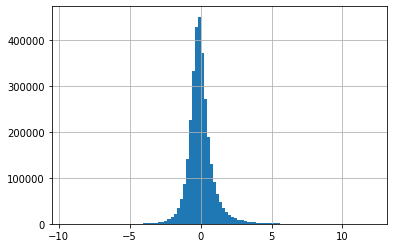

In [10]:
train.target.hist(bins = 100)

In [11]:
# all numeric features
train.sample(10000).nunique().sort_values()

time_id           1207
investment_id     3200
f_124             5251
f_182             5288
f_170             5288
                 ...  
f_19             10000
f_214            10000
f_160            10000
f_135            10000
row_id           10000
Length: 304, dtype: int64

<AxesSubplot:>

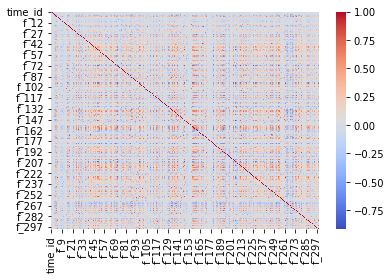

In [12]:
sns.heatmap(train.sample(10000).corr(), cmap = 'coolwarm')

In [13]:
train.sample(20000).corr()['target'].sort_values(ascending = False)

target    1.000000
f_145     0.052201
f_119     0.048753
f_270     0.047593
f_17      0.046712
            ...   
f_71     -0.057446
f_212    -0.057941
f_280    -0.058750
f_25     -0.060207
f_265    -0.062115
Name: target, Length: 303, dtype: float64

<AxesSubplot:>

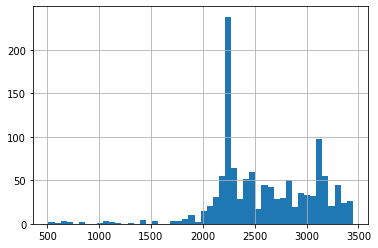

In [14]:
train.time_id.value_counts().hist(bins = 50)

<AxesSubplot:>

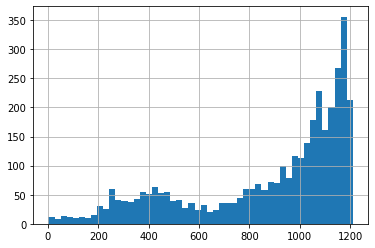

In [15]:
train.investment_id.value_counts().hist(bins = 50)

The range of assets is more extended than the number fo assets themselves. In fact, assets will change in part in the test set, therefore you have to consider strategies for handling the ones in the training set in a generalizable way. See: https://www.kaggle.com/c/ubiquant-market-prediction/discussion/301693#1656092

# Target Analysis

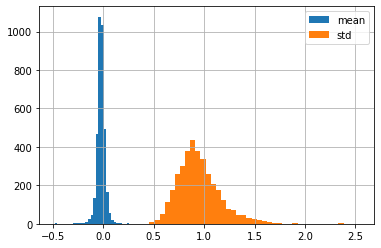

In [16]:
train.groupby('investment_id')['target'].mean().hist(bins = 50, label = 'mean')
train.groupby('investment_id')['target'].std().hist(bins = 50, label = 'std')
plt.legend()
plt.show()

The average of mean target by asset show a bell-shaped distribution, beware that there are outliers, anyway, because there are some assets with quite negative average target (-0.4 area) and some quite positive ones (+0.8 area). Overall the average mean target by asset is slightly negative (-0.0231)

Also the average of mean standard deviation (std) by asset presents some interesting patterns. First of all, it is skewed toward the right, with some assets having more std (up to 2.5). On the other side there are also some few assets with std almost at zero.

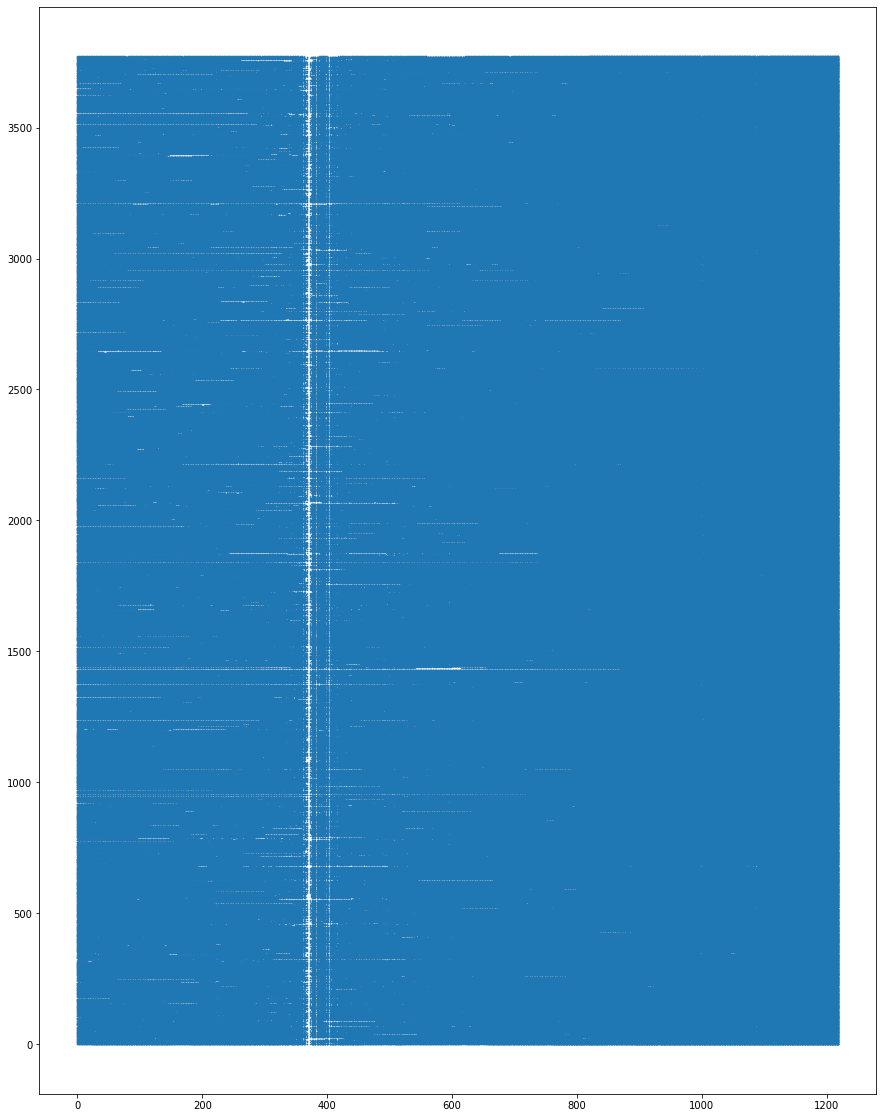

In [17]:
plt.figure(figsize = (15,20))
plt.scatter(train.time_id, train.investment_id, s=0.2)

Assets are distributed in a different way, there are assets that are actually more frequently observed and others that are not. A good cv and modelling strategy should keep this into account (stratify if you are working with subsamples).

In [18]:
obs_by_asset = train.groupby('investment_id')['target'].size()
mean_target = train.groupby('investment_id')['target'].mean()
std_target = train.groupby('investment_id')['target'].std()

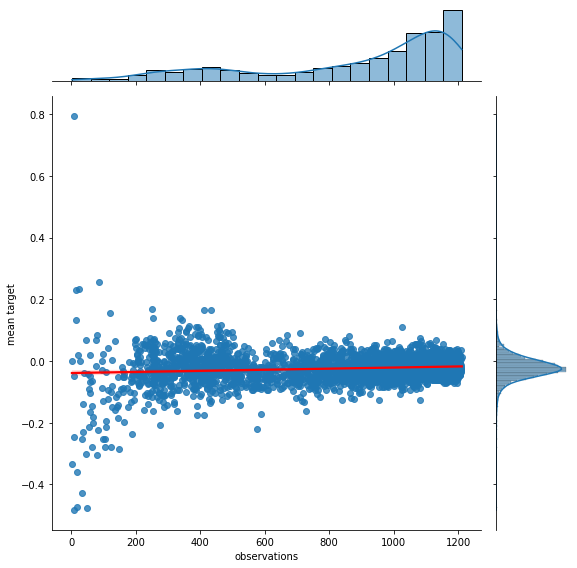

In [19]:
ax = sns.jointplot(x=obs_by_asset, y=mean_target, kind="reg", 
                   height=8, joint_kws={'line_kws':{'color':'red'}})
ax.ax_joint.set_xlabel('observations')
ax.ax_joint.set_ylabel('mean target')
plt.show()

By jointly plotting the distribution of observartions by asset and the mean target value by asset, we may notice that the target value slightly reduces proportionally to the number of observation. The dispersion of values tends to grow with less observations, hence we need to re-plot the scatterplot this time using the standard deviation.

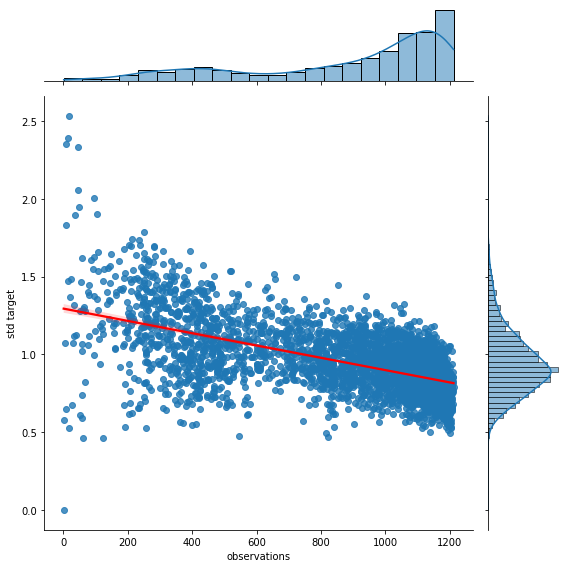

In [20]:
ax = sns.jointplot(x=obs_by_asset, y=std_target, kind="reg", 
                   height=8, joint_kws={'line_kws':{'color':'red'}})
ax.ax_joint.set_xlabel('observations')
ax.ax_joint.set_ylabel('std target')
plt.show()

The new scatterplot reveals that the less the observations, imply a much more uncertainty in the mean target. 

Strategy: in training you need to control this effect by expliciting the number of observations because this is predictive of the uncertainty of the predictions. In the test phase, instead, when you are working with an asset that you don't know about, you need to impute an average number of observations, thus expecting an average dispersion of predictions for that asset.

<AxesSubplot:xlabel='time_id'>

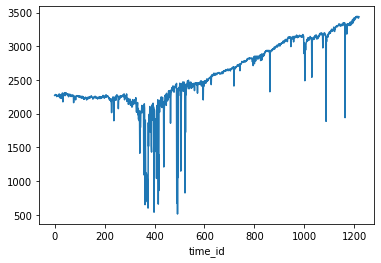

In [21]:
train.groupby('time_id')['investment_id'].nunique().plot()

As we have reasoned how the investments with less observations seem more risky, we notice how the number of the assets present at each time step is quite different and also highly oscillating. By the end of the avaliable time, the number of assets has grown by one third.

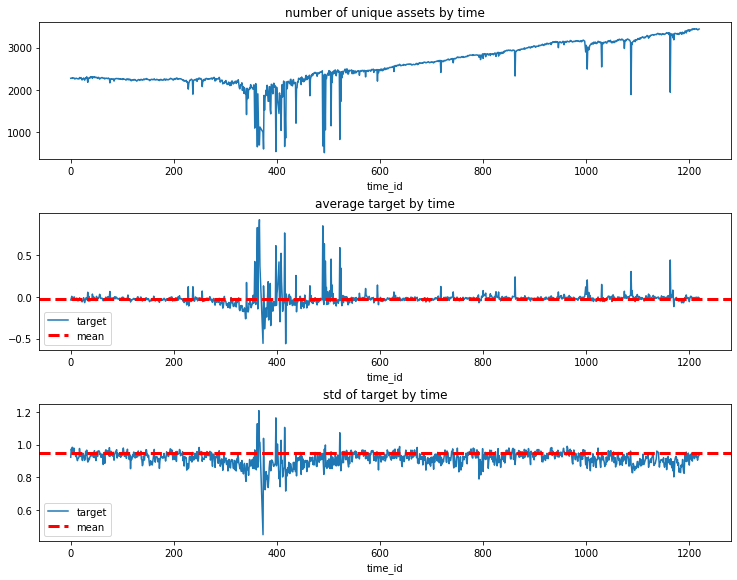

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1,)
(train.groupby('time_id')['investment_id'].nunique()).plot()
plt.title("number of unique assets by time")

plt.subplot(3, 1, 2)
train.groupby('time_id')['target'].mean().plot()
plt.title("average target by time")
plt.axhline(y=mean_target.mean(), color='r', linestyle='--', label="mean", lw = 3)
plt.legend(loc='lower left')

plt.subplot(3, 1, 3)
train.groupby('time_id')['target'].std().plot()
plt.title("std of target by time")
plt.axhline(y=std_target.mean(), color='r', linestyle='--', label="mean", lw = 3)
plt.legend(loc='lower left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [23]:
r = np.corrcoef(train.groupby('time_id')['investment_id'].nunique(), train.groupby('time_id')['target'].mean())[0][1]
print(f"Correlation of number of assets by target: {r:0.3f}")


Correlation of number of assets by target: -0.184


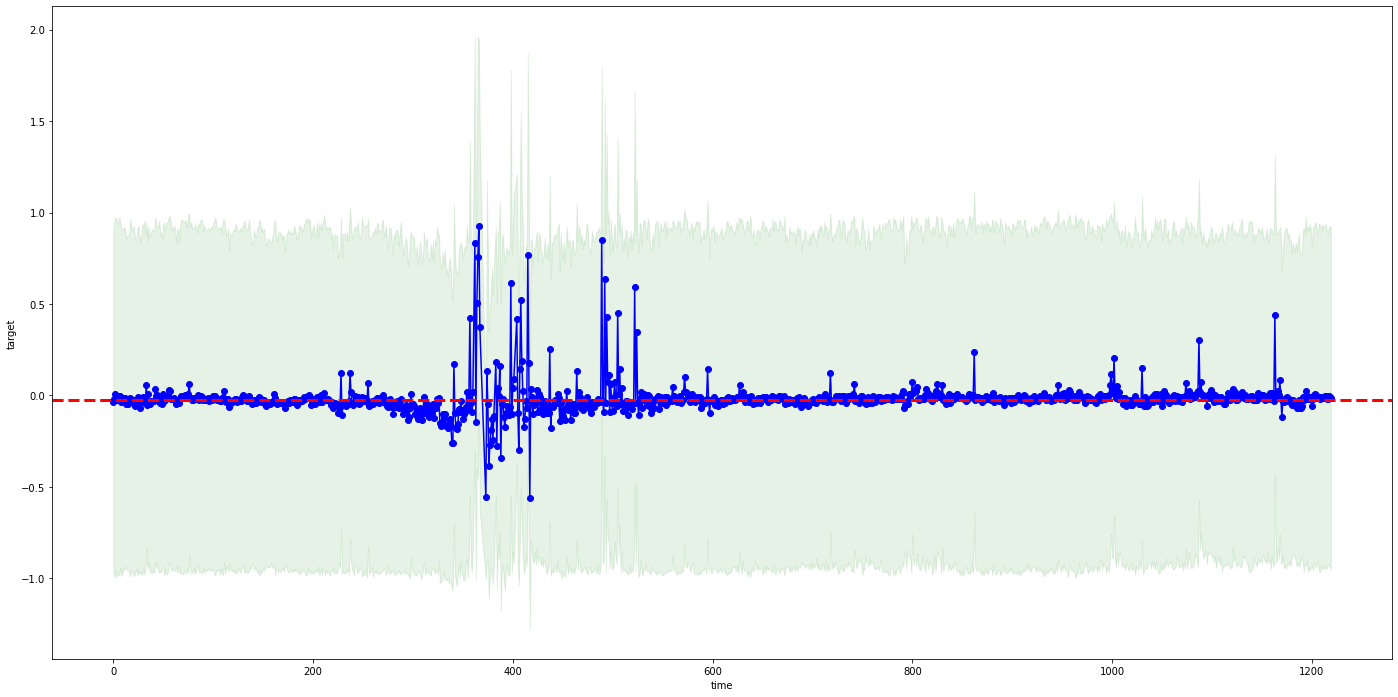

In [24]:
time2target_mean = train.groupby(['time_id'])['target'].mean()
time2target_std = train.groupby(['time_id'])['target'].std()

_, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.fill_between(
        time2target_mean.index,
        time2target_mean - time2target_std,
        time2target_mean + time2target_std,
        alpha=0.1,
        color="g",
    )
plt.plot(
        time2target_mean.index, time2target_mean, "o-", color="b", label="Training score"
    )
plt.axhline(y=mean_target.mean(), color='r', linestyle='--', label="mean", lw = 3)
axes.set_ylabel("target")
axes.set_xlabel("time")
plt.show()

Clearly the target is detrended and forced to mean zero and unit standard deviation, though at times when the number of assets is reduced the average changes and consequently shifts also the confidence interval. Being able to figure out such times of mean shift in the test set could be quite advantageous.

Basically, this chart is the key. The task of the competition is to find out the position of an asset in a day. Is the asset near the average or how much is far away from it (you are predicting volatility, basically). In fact the evaluation is based on the mean of the Pearson correlation coefficient for each time ID.

In the following chart we are overimposing the target for asset 70 with the market average and the unit standard deviation band.

Clearly the position of asset 70 depends on its performance but also on the way the mean and standard deviation for that period_id is calculated (are we analyzing the volatility inside a basket of investment, maybe?).

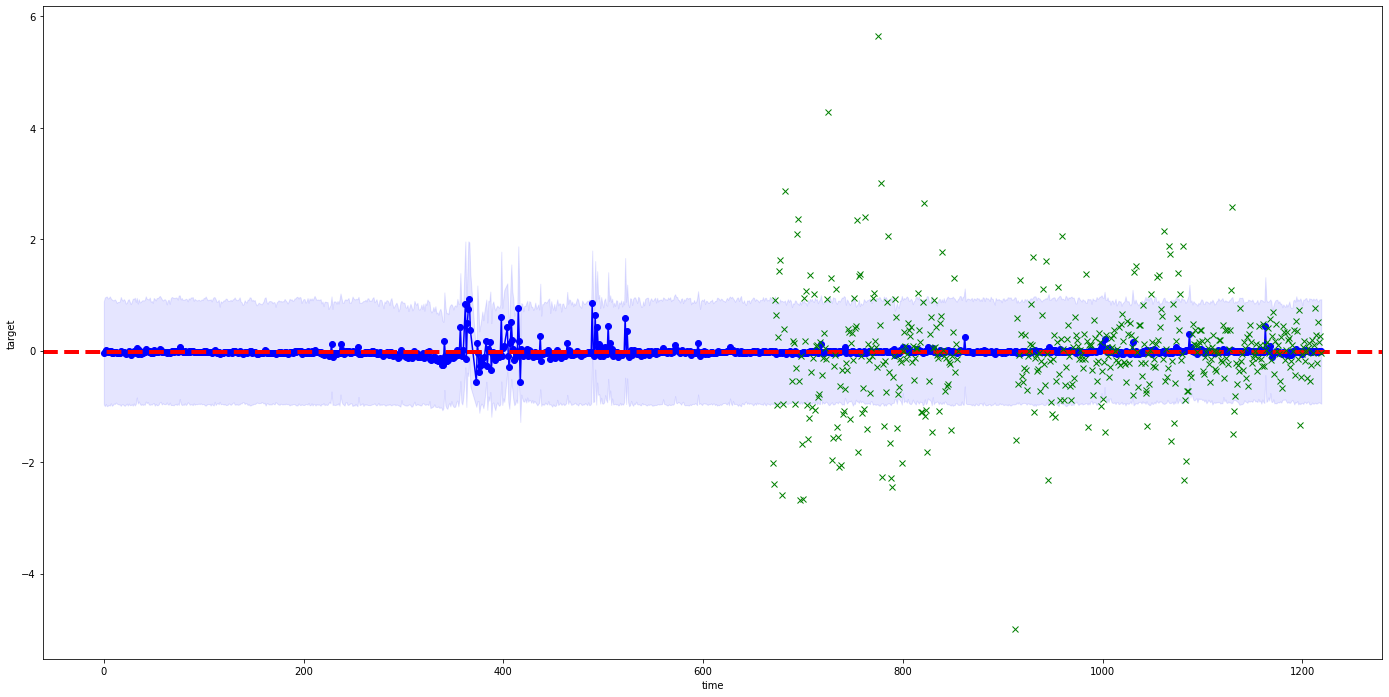

In [25]:
time2target_mean = train.groupby(['time_id'])['target'].mean()
time2target_std = train.groupby(['time_id'])['target'].std()

_, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.fill_between(
        time2target_mean.index,
        time2target_mean - time2target_std,
        time2target_mean + time2target_std,
        alpha=0.1,
        color="b",
    )
plt.plot(
        time2target_mean.index, time2target_mean, "o-", color="b", label="Training score"
    )
plt.axhline(y=mean_target.mean(), color='r', linestyle='--', label="mean", lw = 4)

asset = 70
plt.plot(train[train.investment_id==asset].time_id,
               train[train.investment_id==asset].target, 'x', color = 'g')

axes.set_ylabel("target")
axes.set_xlabel("time")
plt.show()


Strategy: now your cv strategy should be clear, you have to do groupkfold on the time_id, keeping all the assets realtive to a time_id or in train or in validation.

# Hypothesis: we can get a proxy of the count of obs by asset based on the features?

In [26]:
obs_by_asset = train.groupby(['investment_id'])['target'].count().to_dict()
target = train.investment_id.copy().replace(obs_by_asset).astype(np.int16)
features = train.columns[4:]
target

0          1108
1          1003
2          1082
3           625
4          1087
           ... 
3141405    1052
3141406    1171
3141407     889
3141408    1084
3141409     376
Name: investment_id, Length: 3141410, dtype: int16

In [27]:
del(obs_by_asset)
corrs = list()
for col in features:
    corr = np.corrcoef(target, train[col])[0][1]
    corrs.append(corr)
    
del(target)
corrs[:20]

[0.004736491061572676,
 -0.018085109127428608,
 0.0658548838148438,
 -0.16130316314012558,
 -0.17376571142993721,
 -0.0017500747845773151,
 -0.05815708369407832,
 0.18735877664372688,
 0.13043320511384457,
 -0.008200113486353255,
 0.13326470750150649,
 0.003099229483803268,
 0.05013301756913903,
 -0.004850396378247534,
 -0.0029554095387851072,
 -0.31521229377188426,
 -0.1464652856750193,
 -0.01589589665258099,
 0.004464424718192879,
 0.01918675825798829]

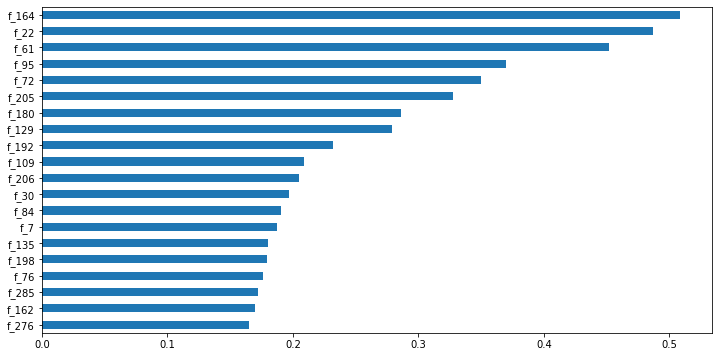

In [28]:
feat_importances = pd.Series(corrs, index=features)
feat_importances.nlargest(20).plot(kind='barh', figsize=(12, 6)).invert_yaxis()
plt.show()

Actually based on a few features, the fact that an asset has less or more observations should be quite predictable based on features with high correlation.

# sample record

In [29]:
tmp = train[train.investment_id == 1062]
tmp

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_254,f_255,f_256,f_257,f_258,f_259,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
652,0_1062,0,1062,-0.468671,-0.706653,-0.765238,0.620830,-0.581358,0.993605,0.408986,-1.014136,0.095467,0.114809,1.767237,0.568750,-1.500521,-0.299669,1.545938,0.893144,0.493121,-0.360222,-0.795652,-0.798325,-0.274717,1.514304,1.021932,0.325659,0.506284,-0.580076,-0.697355,0.584654,0.551460,-1.264652,0.369922,-0.772510,-0.567811,0.193658,0.227893,-0.478656,-1.019345,-1.102633,0.318607,-0.220715,0.150682,-1.734443,0.0,-0.625486,0.543677,-0.909959,0.735909,-1.375268,-0.167978,-0.840763,1.672215,1.207785,-1.546700,0.126111,0.082327,-1.326123,0.665396,0.631208,0.272635,-0.417051,-0.861674,1.052889,0.495243,-0.170443,-0.119705,0.416111,-0.160476,-0.550049,-0.300102,-0.912893,1.924908,-0.797469,-0.643473,-1.156277,1.175052,0.148335,0.876370,-1.889800,-0.820315,-0.024504,-1.129117,-0.725216,-1.061575,-0.032771,-0.009739,-0.324115,0.478538,-1.464586,0.992118,1.685829,-0.719781,0.458115,0.028216,-0.504775,0.611729,1.373285,-0.748614,-0.089654,0.679134,0.056345,-0.301417,-0.918706,1.192469,-0.980246,-0.988898,0.911709,0.083465,0.766609,-0.778925,0.065995,0.890967,-0.290496,0.280828,1.174991,-0.845299,0.735432,1.172035,-0.799616,-0.751252,-1.171431,-1.278963,-2.400776,-0.589889,-0.401835,0.625975,0.0,-0.799908,-1.238676,0.017041,0.987049,-0.067732,-1.697785,-0.878342,0.788408,-1.343340,-0.339070,0.169206,-0.731837,-0.727861,-0.878910,-0.954769,0.445254,1.340405,0.247752,-1.378464,-0.730910,0.078155,-0.707219,-1.002146,1.313210,-0.718942,0.329076,-0.437903,0.653437,0.069232,-0.490745,-0.783982,0.894645,1.651962,-0.957953,-1.301518,-1.009821,-1.484866,-0.469855,-0.635345,0.484227,0.071048,0.166579,0.656969,-0.513040,-0.699454,1.000001,-0.868112,-0.499799,1.464270,-0.709953,-1.000001,0.877145,-0.577665,-1.213652,-0.052410,1.050131,1.878611,1.000001,0.035142,-1.201712,-0.149064,1.101376,-0.208937,-0.969556,-0.836816,1.283493,-0.833030,1.416859,-0.675533,0.110969,1.064860,0.017915,1.025220,-1.041251,1.352322,0.000000,-0.496275,-0.156579,-0.198539,0.076939,-1.308248,-0.040962,0.815297,-0.096668,-0.543615,0.273005,1.222594,0.708510,0.804357,-1.199710,0.569348,0.492608,-0.781856,0.412967,0.777562,-0.273612,0.151109,-0.947877,0.597873,-0.139442,0.222740,1.255500,-1.737111,1.313390,-0.897759,-0.492390,-0.269776,-0.466078,0.060626,-0.434127,-0.364659,-0.4

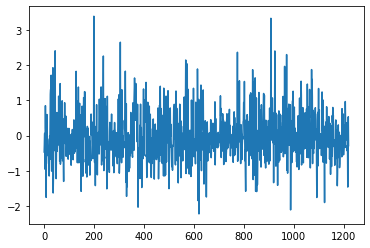

In [30]:
plt.plot(tmp.time_id, tmp.target)